<a href="https://colab.research.google.com/github/KyeoRaeHan/AI_Solution_Course_DL/blob/main/DL21_classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로이터 데이터셋
1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 **텍스트 분류**를 위해 널리 사용되는 간단한 데이터셋입니다. 

46개의 토픽이 있으며, 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[:5]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [7]:
train_labels[:5]

array([3, 4, 3, 4, 4])

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 레이블의 원-핫 인코딩은 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터

In [9]:
# 사용자 함수
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
# 내장함수
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 4s 27ms/step - loss: 3.1618 - accuracy: 0.2955 - val_loss: 1.8335 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.6162 - accuracy: 0.6900 - val_loss: 1.3238 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0796 - accuracy: 0.7849 - val_loss: 1.1187 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8429 - accuracy: 0.8262 - val_loss: 1.0122 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6490 - accuracy: 0.8679 - val_loss: 0.9484 - val_accuracy: 0.8140
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5296 - accuracy: 0.8947 - val_loss: 0.9331 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4149 - accuracy: 0.9171 - val_loss: 0.8963 - val_accuracy: 0.8250
Epoch 8/20
16

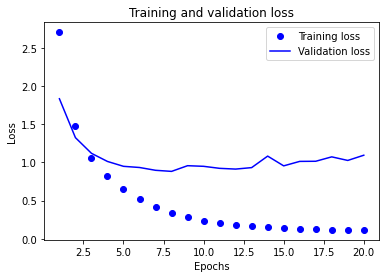

In [20]:
# 손실과 정확도 곡선
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

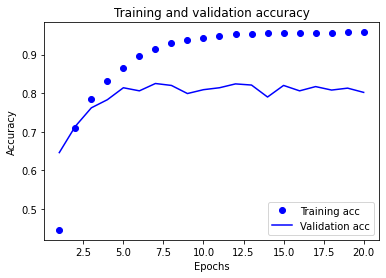

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# 적절한 epochs 9 적용, 모델 훈련 및 테스트 세트에서 평가
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 3.1272 - accuracy: 0.4299 - val_loss: 1.7313 - val_accuracy: 0.6410
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.5102 - accuracy: 0.7048 - val_loss: 1.2813 - val_accuracy: 0.7170
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0775 - accuracy: 0.7793 - val_loss: 1.0938 - val_accuracy: 0.7670
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8418 - accuracy: 0.8296 - val_loss: 1.0145 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6686 - accuracy: 0.8631 - val_loss: 0.9322 - val_accuracy: 0.8080
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5178 - accuracy: 0.8908 - val_loss: 0.9009 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4341 - accuracy: 0.9100 - val_loss: 0.9194 - val_accuracy: 0.8040
Epoch 8/9
16/16 [===

In [23]:
results

[0.9951359033584595, 0.7858415246009827]

In [24]:
predictions = model.predict(x_test)
predictions

array([[1.3712862e-04, 8.0099696e-04, 7.8371922e-06, ..., 2.3536470e-05,
        8.6622504e-06, 4.4524845e-06],
       [6.8619935e-04, 4.4591716e-04, 4.0791212e-05, ..., 6.5994291e-06,
        1.2994834e-06, 5.1938810e-06],
       [3.0810779e-03, 7.9808408e-01, 1.1687063e-02, ..., 3.2625749e-04,
        1.0321185e-03, 3.5763005e-04],
       ...,
       [3.0092153e-04, 3.5678109e-04, 3.1194457e-05, ..., 2.9792425e-05,
        5.8072972e-05, 2.1097685e-05],
       [1.2392091e-02, 6.4005658e-02, 3.1686982e-04, ..., 8.1886217e-04,
        6.9555012e-04, 9.4302566e-05],
       [3.9598759e-04, 5.7958674e-01, 3.9824992e-03, ..., 9.2182549e-05,
        9.4347587e-04, 1.1879350e-05]], dtype=float32)

In [26]:
np.sum(predictions[0])

1.0

In [30]:
np.argmax(predictions[0])

3

In [31]:
# 은닉층 4로 수정

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.6309 - accuracy: 0.0902 - val_loss: 3.1295 - val_accuracy: 0.0780
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.9297 - accuracy: 0.2322 - val_loss: 2.6184 - val_accuracy: 0.2560
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.3759 - accuracy: 0.2830 - val_loss: 2.0680 - val_accuracy: 0.3030
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.6815 - accuracy: 0.4326 - val_loss: 1.4932 - val_accuracy: 0.6600
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1679 - accuracy: 0.7068 - val_loss: 1.3809 - val_accuracy: 0.6840
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0268 - accuracy: 0.7584 - val_loss: 1.3317 - val_accuracy: 0.7070
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8838 - accuracy: 0.7835 - val_loss: 1.3315 - val_accuracy: 0.7120
Epoch 8/20
63/63 [==